<a href="https://colab.research.google.com/github/GreenMen1/ML-Projects/blob/main/EDA_cars_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подержанные автомобили

Датасет содержит информацию о характеристиках и ценах подержанных автомобилей в некоторой стране

## Импорт библиотек, константы

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42

In [3]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/cars.csv"

## Загрузка и обзор данных

### Загрузка

In [4]:
# загрузка данных
df = pd.read_csv('cars.csv')

### Описание данных

**Целевая переменная**
- `selling_price`: цена продажи, числовая

**Признаки**
- `name` (string): модель автомобиля
- `year` (numeric, int): год выпуска с завода-изготовителя
- `km_driven` (numeric, int): пробег на дату продажи
- `fuel` (categorical: _Diesel_ или _Petrol_, или _CNG_, или _LPG_, или _electric_): тип топлива
- `seller_type` (categorical: _Individual_ или _Dealer_, или _Trustmark Dealer_): продавец
- `transmission` (categorical: _Manual_ или _Automatic_): тип трансмиссии
- `owner` (categorical: _First Owner_ или _Second Owner_, или _Third Owner_, или _Fourth & Above Owner_): какой по счёту хозяин?
- `mileage` (string, по смыслу числовой): пробег, требует предобработки км / л
- `engine` (string, по смыслу числовой): рабочий объем двигателя, требует предобработки
- `max_power` (string, по смыслу числовой): пиковая мощность двигателя, требует предобработки
- `torque` (string, по смыслу числовой, а то и 2): крутящий момент, требует предобработки
- `seats` (numeric, float; по смыслу categorical, int)

In [5]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [6]:
# первые пять записей из датасета
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


Всего элементов 6999, есть небольшие пропуски. 13 параметров, из них целевой цена selling_price. Переведем в численные типы столбцы mileage, engine, max_power, torque, seats. Предварительно столб Крутящего момента разделим на 2 - Н\м и Оборотов в минуту rpm. Но сначала посмотрим на объекты где есть пропуски.

In [7]:
df[df['mileage'].isna()].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
12,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
69,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
78,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
107,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN


In [8]:
df[df['name']=='Maruti Swift 1.3 VXi'].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
12,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
197,Maruti Swift 1.3 VXi,2008,130000,120000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
267,Maruti Swift 1.3 VXi,2010,215000,70000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
647,Maruti Swift 1.3 VXi,2006,140000,65000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
1141,Maruti Swift 1.3 VXi,2008,240000,60000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [9]:
df[df['name']=='Tata Indica DLS'].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
69,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
220,Tata Indica DLS,2005,75000,110000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
3135,Tata Indica DLS,2005,95000,50000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
4670,Tata Indica DLS,2006,170000,77000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
6261,Tata Indica DLS,2005,60000,100000,Diesel,Individual,Manual,Fourth & Above Owner,NaN,NaN,NaN,NaN,NaN


Как видно, почти везде там где есть пропуск у обьекта в одном из столбцов с пропусками, пусто и в других проблемных столбцах, и чаще это в рамках одной модели. Поэтому, чтобы не заполнять много пустоты у обьектов по сути одной модели, и потому как пропуски почти построчно и таких строк немного, можно просто удалить строки с пустотами.

In [10]:
df = df[df['mileage'].isna()==False]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6797 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6797 non-null   object 
 1   year           6797 non-null   int64  
 2   selling_price  6797 non-null   int64  
 3   km_driven      6797 non-null   int64  
 4   fuel           6797 non-null   object 
 5   seller_type    6797 non-null   object 
 6   transmission   6797 non-null   object 
 7   owner          6797 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6797 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 743.4+ KB


Всего 202 строчки убрали из 7000, это около 3% от датафрейма, что не страшно. Теперь переводы единиц у столбцов. А также нужен сброс индексов.

In [12]:
df = df.reset_index(drop=True)

In [13]:
df['torque-N/m'] = df['torque']
df['torque-RPM'] = df['torque']
df = df.drop('torque', axis=1)

df['torque-N/m'] = df['torque-N/m'].fillna('0 0')
df['torque-RPM'] = df['torque-RPM'].fillna('0 0')


In [14]:
for i in range(len(df)):
  df.loc[i,'mileage'] = float(df.loc[i,'mileage'].split(' ')[0])
  df.loc[i,'engine'] = int(df.loc[i,'engine'].split(' ')[0])
  if len(df.loc[i,'max_power']) < 3:
    df.loc[i,'max_power'] = float(df.loc[i,'max_power'])
  else:
    if df.loc[i,'max_power'].split(' ')[0] == '':
      df.loc[i,'max_power'] = 0.0
    else:
      df.loc[i,'max_power'] = float(df.loc[i,'max_power'].split(' ')[0])
  df.loc[i,'seats'] = int(df.loc[i,'seats'])



Далее перевод единиц связанных с крутящим моментом

In [15]:
def v(txt):
  ch=0
  if 'n' in txt:
    ind = txt.find('n')
    ch = float(txt[:ind])
  elif 'N' in txt:
    ind = txt.find('N')
    ch = float(txt[:ind])
  elif 'k' in txt:
    ind = txt.find('k')
    ch = float(txt[:ind])
  elif 'K' in txt:
    ind = txt.find('K')
    ch = float(txt[:ind])
  elif '@' in txt:
    ind = txt.find('@')
    ch = float(txt[:ind])
  else:
    ch = float(txt)
  return ch

ls_kg = []
ls_nm = []

for i in range(len(df)):
  sp = df.loc[i,'torque-N/m'].split(' ')
  b = sp[0]
  elid=0
  for el in sp:
    if 'n' in el:
      df.loc[i,'torque-N/m'] = v(b)
      break
    elif 'N' in el:
      df.loc[i,'torque-N/m'] = v(b)
      break
    elif 'k' in el:
      df.loc[i,'torque-N/m'] = v(b) * 9.80665
      break
    elif 'K' in el:
      df.loc[i,'torque-N/m'] = v(b) * 9.80665
      break
    elid +=1
  if elid == len(sp):
    df.loc[i,'torque-N/m'] = v(b)

In [16]:
for i in range(len(df)):
  if len(df.loc[i,'torque-RPM'].split(' ')) == 1:
    df.loc[i,'torque-RPM'] = '0'
  elif len(df.loc[i,'torque-RPM'].split(' ')) == 2:
    df.loc[i,'torque-RPM'] = df.loc[i,'torque-RPM'].split(' ')[1]
  elif len(df.loc[i,'torque-RPM'].split(' ')) == 3:
    if df.loc[i,'torque-RPM'].split(' ')[1] == '/':
      df.loc[i,'torque-RPM'] = df.loc[i,'torque-RPM'].split(' ')[2]
    else:
      df.loc[i,'torque-RPM'] = df.loc[i,'torque-RPM'].split(' ')[1]
  elif len(df.loc[i,'torque-RPM'].split(' ')) == 4:
    if df.loc[i,'torque-RPM'].split(' ')[3] == 'rpm':
      df.loc[i,'torque-RPM'] = df.loc[i,'torque-RPM'].split(' ')[2]
    else:
      df.loc[i,'torque-RPM'] = df.loc[i,'torque-RPM'].split(' ')[3]
  else:
    df.loc[i,'torque-RPM'] = df.loc[i,'torque-RPM'].split(' ')[3]

In [17]:
for i in range(len(df)):
  if '-' in df.loc[i,'torque-RPM'] and 'r' in df.loc[i,'torque-RPM']:
    ind1 = df.loc[i,'torque-RPM'].find('-')
    ind2 = df.loc[i,'torque-RPM'].find('r')
    df.loc[i,'torque-RPM'] = df.loc[i,'torque-RPM'][ind1+1:ind2]
  elif 'r' in df.loc[i,'torque-RPM']:
    ind = df.loc[i,'torque-RPM'].find('r')
    df.loc[i,'torque-RPM'] = df.loc[i,'torque-RPM'][:ind]
  elif '(' in df.loc[i,'torque-RPM']:
    ind = df.loc[i,'torque-RPM'].find('(')
    ch = df.loc[i,'torque-RPM'][:ind].split(',')
    df.loc[i,'torque-RPM'] = ''.join(ch)
  elif ',' in df.loc[i,'torque-RPM']:
    ch = df.loc[i,'torque-RPM'].split(',')
    df.loc[i,'torque-RPM'] = ''.join(ch)
  elif '-' in df.loc[i,'torque-RPM']:
    ind = df.loc[i,'torque-RPM'].find('-')
    df.loc[i,'torque-RPM'] = df.loc[i,'torque-RPM'][ind+1:]
  elif '~' in df.loc[i,'torque-RPM']:
    ind = df.loc[i,'torque-RPM'].find('~')
    df.loc[i,'torque-RPM'] = df.loc[i,'torque-RPM'][ind+1:]
  elif '/' in df.loc[i,'torque-RPM']:
    ind = df.loc[i,'torque-RPM'].find('/')
    df.loc[i,'torque-RPM'] = df.loc[i,'torque-RPM'][ind+1:]
for i in range(len(df)):
  if '~' in df.loc[i,'torque-RPM']:
    ind = df.loc[i,'torque-RPM'].find('~')
    df.loc[i,'torque-RPM'] = df.loc[i,'torque-RPM'][ind+1:]
  elif '-' in df.loc[i,'torque-RPM']:
    ind = df.loc[i,'torque-RPM'].find('-')
    df.loc[i,'torque-RPM'] = df.loc[i,'torque-RPM'][ind+1:]
  elif ',' in df.loc[i,'torque-RPM']:
    ch = df.loc[i,'torque-RPM'].split(',')
    df.loc[i,'torque-RPM'] = ''.join(ch)

In [18]:
df['torque-N/m'] = df['torque-N/m'].astype(float)
df['torque-RPM'] = df['torque-RPM'].astype(int)
df['mileage'] = df['mileage'].astype(float)
df['engine'] = df['engine'].astype(int)
df['max_power'] = df['max_power'].astype(float)
df['seats'] = df['seats'].astype(int)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6797 entries, 0 to 6796
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6797 non-null   object 
 1   year           6797 non-null   int64  
 2   selling_price  6797 non-null   int64  
 3   km_driven      6797 non-null   int64  
 4   fuel           6797 non-null   object 
 5   seller_type    6797 non-null   object 
 6   transmission   6797 non-null   object 
 7   owner          6797 non-null   object 
 8   mileage        6797 non-null   float64
 9   engine         6797 non-null   int64  
 10  max_power      6797 non-null   float64
 11  seats          6797 non-null   int64  
 12  torque-N/m     6797 non-null   float64
 13  torque-RPM     6797 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 743.5+ KB


In [20]:
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque-N/m,torque-RPM
2953,Mitsubishi Pajero Sport 4X4,2015,1700000,39000,Diesel,Individual,Manual,First Owner,13.50,2477,175.56,7,400.0,2500
4495,Maruti Ritz VDi,2013,390000,77000,Diesel,Dealer,Manual,First Owner,21.10,1248,73.90,5,113.0,4500
3968,Hyundai Grand i10 Asta,2015,484999,55380,Petrol,Dealer,Manual,First Owner,18.90,1197,82.00,5,114.0,4000
2505,Tata Indica Vista TDI LX,2011,210000,120000,Diesel,Individual,Manual,First Owner,19.40,1405,70.00,5,135.4,2500
3503,BMW X4 M Sport X xDrive20d,2019,5400000,7500,Diesel,Dealer,Automatic,First Owner,16.78,1995,190.00,5,400.0,2500


Численные типы данных переведены. В столбце крутящего момента, где были единицы кг\м был также перевод в Н/м, а где число оборотов бралось максимальное значение, если даны два. Посмотрим на уникальные значения категориальных признаков.

In [21]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [22]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [23]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [24]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

В целом все в порядке, но к признаке Владельцы есть вариант тест драйва. Посмотрим сколько таких объектов.

In [25]:
len(df[df['owner']=='Test Drive Car'])

4

Таких объекта всего 4, значит их можно удалить, ведь и их мало, и нас интересуют только подержаные авто.

In [26]:
df = df[df['owner']!='Test Drive Car']


Перед нумеризацие категориальных признаков давайте посмотрим на распределения числовых значений, а также корреляцию между ними.

In [27]:
df.corr()

<ipython-input-27-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,selling_price,km_driven,mileage,engine,max_power,seats,torque-N/m,torque-RPM
year,1.000000,0.411891,-0.423073,0.326652,0.019942,0.223262,-0.009703,0.090390,0.065054
selling_price,0.411891,1.000000,-0.218223,-0.122045,0.457946,0.749694,0.040353,0.497548,-0.081470
km_driven,-0.423073,-0.218223,1.000000,-0.162870,0.194509,-0.042918,0.216543,0.076748,-0.196525
mileage,0.326652,-0.122045,-0.162870,1.000000,-0.572204,-0.370289,-0.449413,-0.257899,-0.172925
engine,0.019942,0.457946,0.194509,-0.572204,1.000000,0.701474,0.608553,0.618538,-0.202126
max_power,0.223262,0.749694,-0.042918,-0.370289,0.701474,1.000000,0.183869,0.688750,-0.024126
seats,-0.009703,0.040353,0.216543,-0.449413,0.608553,0.183869,1.000000,0.289888,-0.183765
torque-N/m,0.090390,0.497548,0.076748,-0.257899,0.618538,0.688750,0.289888,1.000000,-0.300762
torque-RPM,0.065054,-0.081470,-0.196525,-0.172925,-0.202126,-0.024126,-0.183765,-0.300762,1.000000


Сильнее всего цена зависит от мощности, и почти не зависит от числа мест и оборотов в минуту. В целом от этих двух столбцов можно было бы избавиться. Теперь посмотрим на распределения величин.

<Axes: xlabel='year', ylabel='Count'>

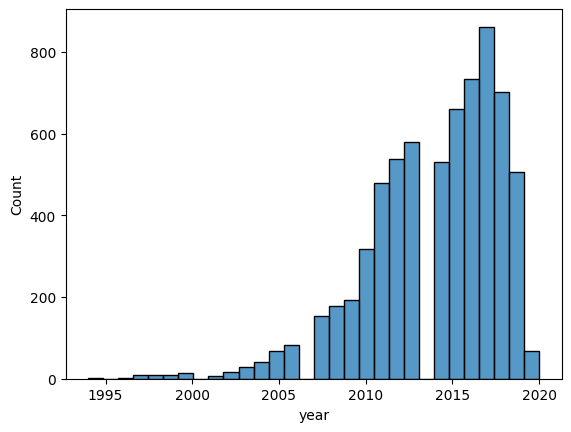

In [28]:
sns.histplot(df['year'], bins=30)

С годами все относительно впорядке.

<Axes: xlabel='selling_price', ylabel='Count'>

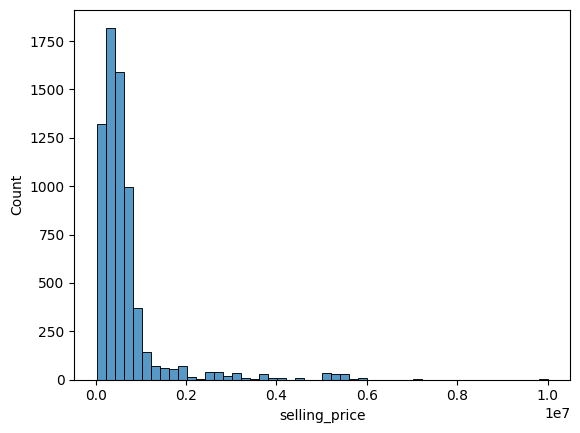

In [29]:
sns.histplot(df['selling_price'], bins=50)

In [30]:
len(df[df['selling_price']>2000000])

302

In [31]:
len(df[df['selling_price']<1000])

0

Цена это наш целевой показатель, и хоть тут и нету отрицательных значений, но есть существенные выбросы, от них лучше избавиться. Уберем элементы с ценой больше 2млн. Машин дешевле 1000 нету, значит хорошо всё, бесплатно не раздают.

In [32]:
df = df[df['selling_price']<2000000]

<Axes: xlabel='km_driven', ylabel='Count'>

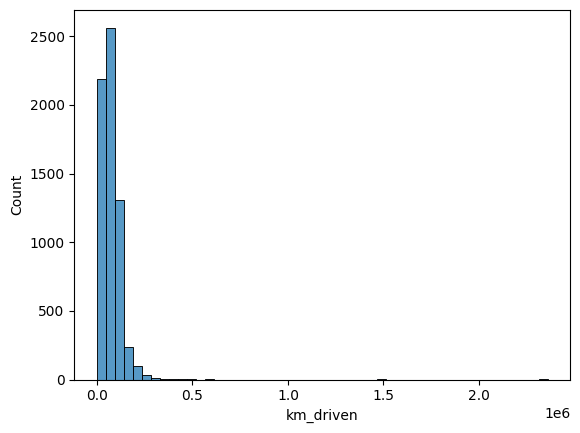

In [33]:
sns.histplot(df['km_driven'], bins=50)

Тут тоже есть выбросы, уберем, где проезд больше 300тыс км, это нереально как по мне.

In [34]:
df = df[df['km_driven']<300000]

<Axes: xlabel='mileage', ylabel='Count'>

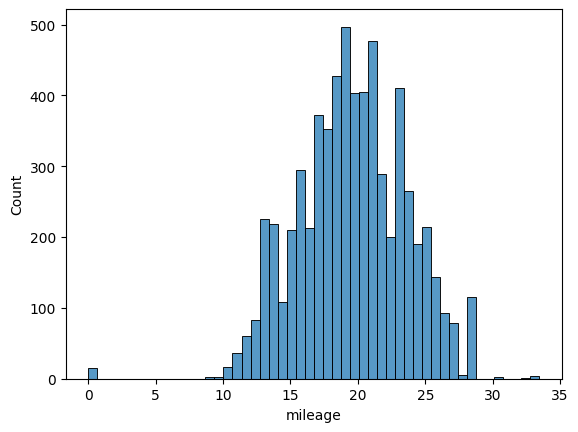

In [35]:
sns.histplot(df['mileage'], bins=50)

Тут в целом всё нормально, не считая машин без пробега.

In [36]:
df[df['mileage']<5]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque-N/m,torque-RPM
542,Tata Indica Vista Aura Safire Anniversary Edition,2009,135000,28900,Petrol,Individual,Manual,Second Owner,0.0,1172,65.00,5,96.10517,3000
1363,Hyundai Santro Xing GL,2008,105000,128000,Petrol,Individual,Manual,First Owner,0.0,1086,62.00,5,96.10000,3000
1388,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987,165.00,5,510.00000,2400
1782,Land Rover Freelander 2 TD4 HSE,2013,1650000,64788,Diesel,Dealer,Automatic,First Owner,0.0,2179,115.00,5,400.00000,2000
1971,Hyundai Santro Xing (Non-AC),2010,110000,80000,Petrol,Individual,Manual,Second Owner,0.0,1086,62.10,5,96.10000,3000
2264,Hyundai Santro Xing (Non-AC),2013,184000,15000,Petrol,Individual,Manual,First Owner,0.0,1086,62.10,5,96.10000,3000
3748,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987,165.00,5,510.00000,2400
4382,Hyundai Santro Xing GL,2008,175000,40000,Petrol,Individual,Manual,First Owner,0.0,1086,62.00,5,96.10000,3000
4855,Volkswagen Polo GT TSI BSIV,2014,574000,28080,Petrol,Dealer,Automatic,First Owner,0.0,1197,103.25,5,175.00000,4100
4858,Volkswagen Polo GT TSI BSIV,2014,575000,28100,Petrol,Dealer,Automatic,First Owner,0.0,1197,103.25,5,175.00000,4100


Все же некоторый пробег у них есть в километраже, значит заменим 0 медианами.

In [37]:
df = df.reset_index(drop=True)

In [38]:
for i in range(len(df)):
  if df.loc[i,'mileage'] == 0.0:
    df.loc[i,'mileage'] = df['mileage'].median()

<Axes: xlabel='engine', ylabel='Count'>

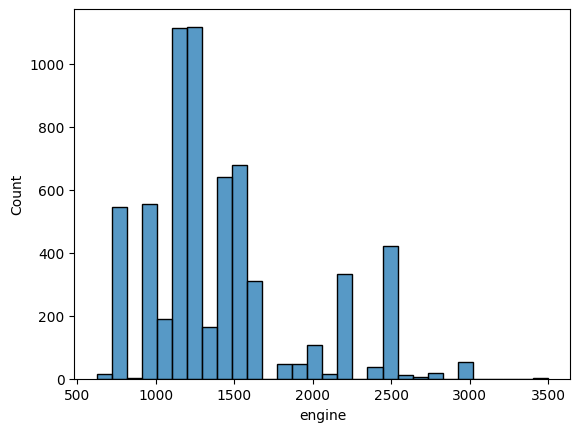

In [39]:
sns.histplot(df['engine'], bins=30)

С объемом двигателей все более-менее нормально.

<Axes: xlabel='max_power', ylabel='Count'>

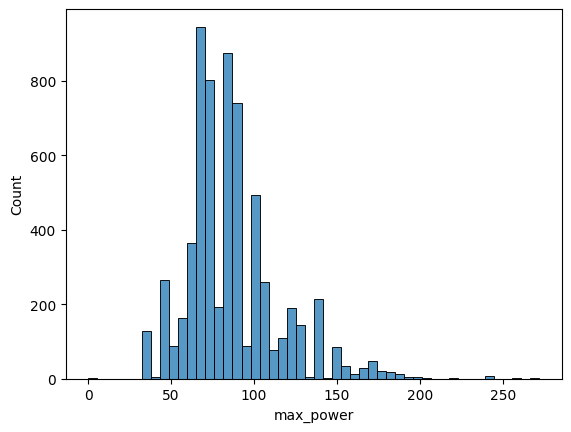

In [40]:
sns.histplot(df['max_power'], bins=50)

In [41]:
df[df['max_power']<5]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque-N/m,torque-RPM
3855,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9,796,0.0,8,0.0,0


Тут один нулевой объект, в том числе и в паре других столбцов. Его удалим. И уберем обхекты с мощьностью более 200

In [42]:
df = df[df['max_power']>5]
df = df[df['max_power']<200]
df = df.reset_index(drop=True)

<Axes: xlabel='seats', ylabel='Count'>

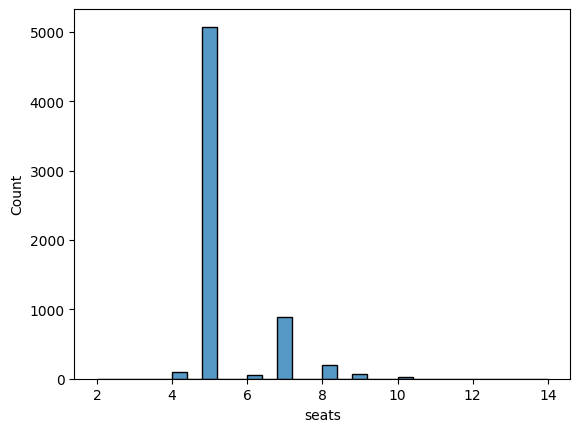

In [43]:
sns.histplot(df['seats'], bins=30)

С местами все относительно впорядке.

<Axes: xlabel='torque-N/m', ylabel='Count'>

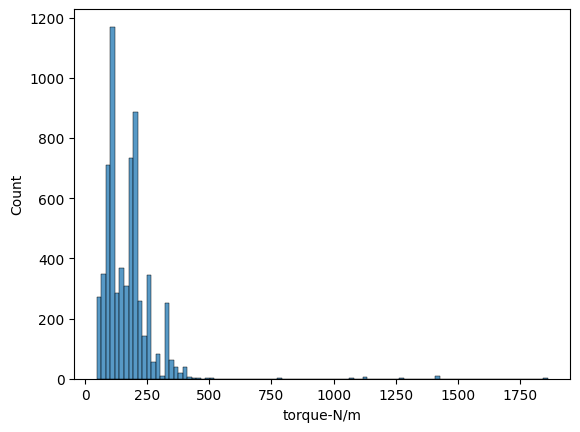

In [44]:
sns.histplot(df['torque-N/m'], bins=100)

In [45]:
len(df[df['torque-N/m']>750])

23

In [46]:
len(df[df['torque-N/m']<10])

0

Убрал выбросы больше 750 Н\м так как они сильно помешают.

In [47]:
df = df[df['torque-N/m']<750]
df = df.reset_index(drop=True)

<Axes: xlabel='torque-RPM', ylabel='Count'>

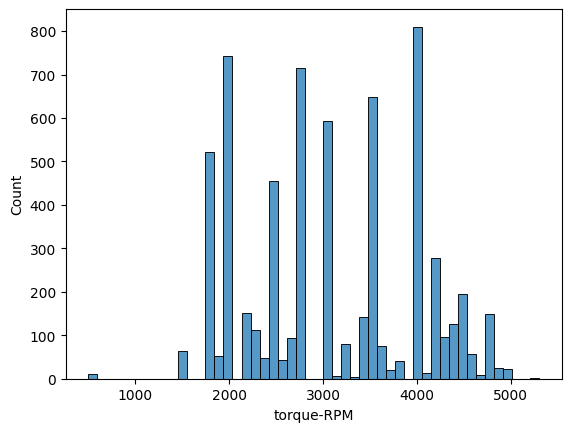

In [48]:
sns.histplot(df['torque-RPM'], bins=50)

В оборотах в минуту 0 заменим на медианы.

In [49]:
for i in range(len(df)):
  if df.loc[i,'torque-RPM'] == 0:
    df.loc[i,'torque-RPM'] = df['torque-RPM'].median()

## Распределения классовых значений

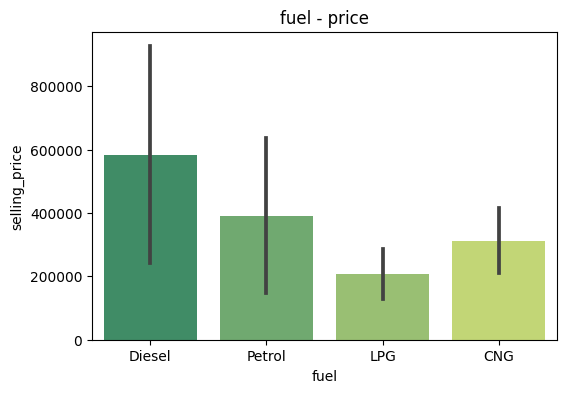

In [50]:
plt.figure(figsize=(6,4))

sns.barplot(x='fuel', y='selling_price', errorbar = "sd", data = df[['fuel','selling_price']], palette='summer')
plt.title('fuel - price')
plt.show()

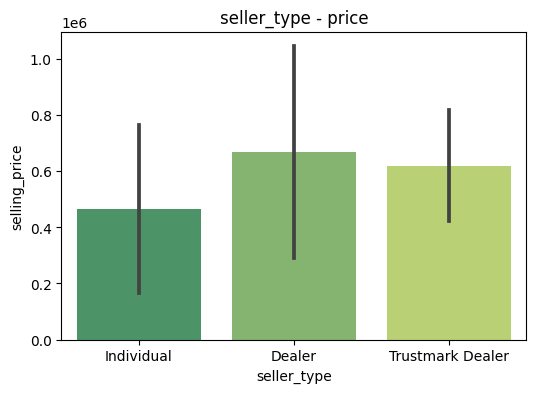

In [51]:
plt.figure(figsize=(6,4))

sns.barplot(x='seller_type', y='selling_price', errorbar = "sd", data = df[['seller_type','selling_price']], palette='summer')
plt.title('seller_type - price')
plt.show()

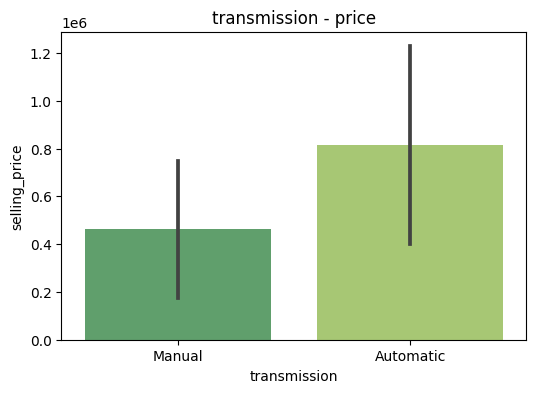

In [52]:
plt.figure(figsize=(6,4))

sns.barplot(x='transmission', y='selling_price', errorbar = "sd", data = df[['transmission','selling_price']], palette='summer')
plt.title('transmission - price')
plt.show()

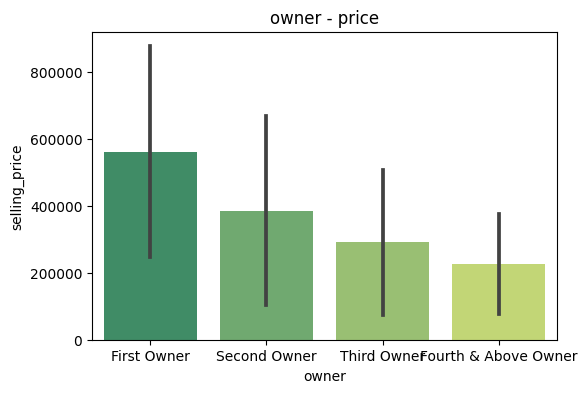

In [53]:
plt.figure(figsize=(6,4))

sns.barplot(x='owner', y='selling_price',
            errorbar = "sd", data = df[['owner','selling_price']],
            palette='summer')
plt.title('owner - price')
plt.show()

Как видно из распределений, машины на дизельном топливе и с автоматической коробкой передач чаще дороже. Покупать дешевле напрямую у владельца, а чем этих владельцев больше, тем также цена ниже, что логично.

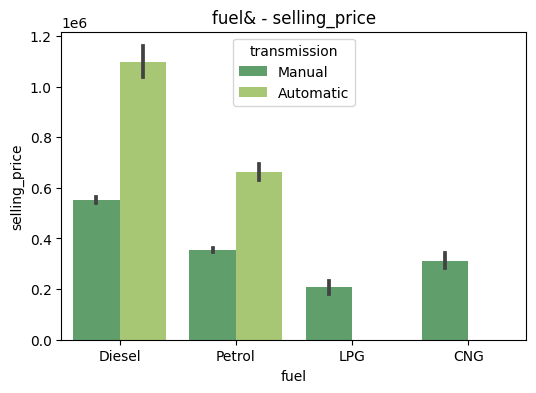

In [54]:
plt.figure(figsize=(6,4))

sns.barplot(x='fuel', y='selling_price', hue='transmission',
            data = df[['fuel','selling_price','transmission']],
            palette='summer')
plt.title('fuel& - selling_price')
plt.show()

Большая стоимость автоматической коробки передач у машин с дизелем. С механикой даже на дизеле в разы дешевле.

## Обучение модели

Создание тестовой и тренировочной выборки

In [55]:
X = df.drop(['selling_price','name'], axis=1)
#,'seats','torque-RPM'
y = df['selling_price'] # целевая переменная (target)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

print(X_train.shape, X_test.shape)

(5116, 12) (1279, 12)


Кодирование категорий

In [57]:
from sklearn.preprocessing import OneHotEncoder

ohe_kat = X_train.select_dtypes(include='object').columns.to_list()
print(ohe_kat)
list_of_chisl = list(X_train.drop(ohe_kat, axis=1).columns)
print(list_of_chisl)

encoder_ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
encoder_ohe.fit(X_train[ohe_kat])
X_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(X_train[ohe_kat])

# удаляем незакодированные категориальные признаки (изначальные колонки)
X_train = X_train.drop(ohe_kat, axis=1)

# энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую
X_test[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(X_test[ohe_kat])
X_test = X_test.drop(ohe_kat, axis=1)

['fuel', 'seller_type', 'transmission', 'owner']
['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque-N/m', 'torque-RPM']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [58]:
#сменим тип данных на целочисленный у преобразованных категориальных признаков

ohe_kat2 = list(X_train.drop(list_of_chisl, axis=1).columns)
for pris in ohe_kat2:
    X_train[pris] = X_train[pris].astype(int)
    X_test[pris] = X_test[pris].astype(int)

In [59]:
print(X_train.shape)
print(X_test.shape)

(5116, 17)
(1279, 17)


Масштабирование

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
'''
scaler.fit(X_train[list_of_chisl])
X_train[list_of_chisl] = scaler.transform(X_train[list_of_chisl])
X_test[list_of_chisl] = scaler.transform(X_test[list_of_chisl])
'''

scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
pd.options.mode.chained_assignment = None

In [61]:
print(X_train.shape)
print(X_test.shape)

(5116, 17)
(1279, 17)


In [62]:
X_train.head()

,year,km_driven,mileage,engine,max_power,seats,torque-N/m,torque-RPM,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
0,0.025415,0.258861,-1.712825,2.333974,0.534438,2.684094,0.465995,0.354849,0.948918,-0.067201,-0.926100,0.408946,-0.168963,0.314320,-0.139749,1.688049,-0.265972
1,1.338788,-1.334982,-1.101184,-0.458426,-0.483033,-0.438195,-0.865454,-0.084059,-1.053832,-0.067201,1.079797,0.408946,-0.168963,0.314320,-0.139749,-0.592400,-0.265972
2,0.550764,-0.119339,0.191487,-0.456274,-0.158622,-0.438195,-0.704066,1.232667,-1.053832,-0.067201,1.079797,0.408946,-0.168963,0.314320,-0.139749,-0.592400,-0.265972
3,0.550764,-1.312470,-1.376165,0.406401,0.641346,-0.438195,-0.166107,0.793758,-1.053832,-0.067201,1.079797,-2.445309,-0.168963,-3.181468,-0.139749,-0.592400,-0.265972
4,0.550764,-0.434506,0.124669,0.191270,0.095746,-0.438195,0.869464,-0.632695,0.948918,-0.067201,-0.926100,0.408946,-0.168963,0.314320,-0.139749,-0.592400,-0.265972


Обучение моделей

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error

model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [64]:
mse = mean_squared_error(y_test,pred)
print('mse линейной регрессии =',round(mse ** 0.5, 2))

mse линейной регрессии = 178791.99


In [65]:
mae = mean_absolute_error(y_test,pred)
print('mae линейной регрессии =',mae)

mae линейной регрессии = 124817.82915496994


In [66]:
!pip install catboost

In [67]:
from catboost import CatBoostRegressor

In [68]:
model_cb = CatBoostRegressor()

param_dict = [{'learning_rate':[0.05, 0.1, 0.15],
                'random_state':[42],
                'depth':[7,8,9],
                'verbose':[False]}]
gridcb = GridSearchCV(model_cb, param_dict, cv=5, scoring='neg_mean_squared_error',n_jobs = -1)
gridcb.fit(X_train, y_train)

print(gridcb.best_estimator_)
print()
print(gridcb.best_params_)
print()
print("RMSE catboost =",(-1 * gridcb.best_score_) ** 0.5)


{'depth': 7, 'learning_rate': 0.1, 'random_state': 42, 'verbose': False}

RMSE catboost = 88971.28764657358


In [69]:
pred = gridcb.predict(X_test)
mae = mean_absolute_error(y_test,pred)
print("MAE catboost =",mae)

MAE catboost = 59400.33593591398


In [70]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9164701117534669


In [71]:
from sklearn.tree import DecisionTreeRegressor

model_t = DecisionTreeRegressor(criterion='squared_error', random_state=RANDOM_STATE, max_depth = 15)
model_t.fit(X_train,y_train)

pred = model.predict(X_test)
mse = mean_squared_error(y_test,pred)
print("RMSE TREE=", round(mse ** 0.5, 2))

RMSE TREE= 178791.99


In [72]:
mae = mean_absolute_error(y_test,pred)
print("MAE TREE=",mae)

MAE TREE= 124817.82915496994


In [73]:


#confusion_matrix(y_test, pred)

Проверка на адекватность через качество фиктивной модели

In [74]:
from sklearn.dummy import DummyRegressor

dummy_model = DummyRegressor(strategy='mean', constant=1)
dummy_model.fit(X_train,y_train)
mse = mean_squared_error(y_test, dummy_model.predict(X_test))
print(mse)
mae = mean_absolute_error(y_test,dummy_model.predict(X_test))
print(mae)


104816185240.40268
239353.98710265852


Модель адекватна.

In [75]:
len(df)- len(df.drop_duplicates ())

737

In [76]:

'''
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(gridcb, f)

#а так модель можно загрузить из файла:
#with open('model.pickle', 'rb') as f:
#    model = pickle.load(f)
'''

"\nimport pickle\n\nwith open('model.pickle', 'wb') as f:\n    pickle.dump(gridcb, f)\n\n#а так модель можно загрузить из файла:\n#with open('model.pickle', 'rb') as f:\n#    model = pickle.load(f)\n"